# Objective

This notebook explored an alternative modeling approach by restructuring the dataframes by Industry rather than Scope 3 Source Type. The rationale was that emission types might be more closely linked to industry characteristics. However, the resulting performance metrics were significantly lower than those from the original structure, so this approach was not pursued further.

In [10]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

dtype_dict = {
    **{col: str for col in [
        "Year of Data", "Primary activity", "Primary sector", "Primary industry",
        "Account Numbers", "Countries", "Scope 3 Sources", "Evaluation Status",
        "Calculation_Method_modeled", 
        "Third_Party_Verification"
    ]},
    **{col: float for col in [
        "log_Scope 1 2 total emission", "log_Revenue_USD",
        "log_Market_Cap_USD", "log_ebitda_USD",
        "log_grossProfit_USD", "log_netIncome_USD",
        "log_cashAndCashEquivalents_USD", "log_longTermInvestments_USD",
        "log_totalAssets_USD", "log_totalLiabilities_USD",
        "log_totalInvestments_USD", "log_totalDebt_USD",
        "log_totalEquity_USD", "log_Scope 3 Amount",
        "Perc emissions calculated w primary data ",
    ]}
}


prepped_df = pd.read_csv(r"C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\Scope_3_non_nulls_non_zero_winds_logged.csv", dtype=dtype_dict)

prepped_df['Calculation_Method_modeled'] = prepped_df['Calculation_Method_modeled'].fillna('Calculation Undetermined')

In [12]:
prepped_df.head()

,Year of Data,Primary activity,Primary sector,Primary industry,Account Numbers,Countries,Company Name,Primary Stock Ticker,Row_num,Scope 3 Sources,Evaluation Status,Scope 3 Amount,Perc emissions calculated w primary data,Scope 1 2 total emission,Third_Party_Verification,Revenue_USD,Market_Cap_USD,ebitda_USD,grossProfit_USD,netIncome_USD,cashAndCashEquivalents_USD,longTermInvestments_USD,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Calculation_Method_modeled,log_ebitda_USD,log_grossProfit_USD,log_netIncome_USD,log_totalEquity_USD,log_Scope 1 2 total emission,log_Revenue_USD,log_Market_Cap_USD,log_cashAndCashEquivalents_USD,log_longTermInvestments_USD,log_totalAssets_USD,log_totalLiabilities_USD,log_totalInvestments_USD,log_totalDebt_USD,Scope_3_windsorized,log_Scope 3 Amount
0,2013,Asset managers,Financial services,Services,44,United Kingdom,3i Group,III LN,5,Waste generated in operations,"Relevant, calculated",12.34,0.0,4.063500e+02,Third party verification or assurance complete,9.385300e+08,4.640933e+09,7.899400e+08,9.385300e+08,6.565900e+08,8.166100e+08,4.460240e+09,5.572760e+09,1.371600e+09,4.460240e+09,1.078230e+09,4.201160e+09,Calculation Undetermined,20.487468,20.659825,20.302570,22.158627,6.009673,20.659825,22.258181,20.520672,22.218468,22.441156,21.039244,22.218468,20.798587,12.34,2.590767
1,2013,Asset managers,Financial services,Services,44,United Kingdom,3i Group,III LN,6,Business travel,"Relevant, calculated",56.78,0.0,4.063500e+02,Third party verification or assurance complete,9.385300e+08,4.640933e+09,7.899400e+08,9.385300e+08,6.565900e+08,8.166100e+08,4.460240e+09,5.572760e+09,1.371600e+09,4.460240e+09,1.078230e+09,4.201160e+09,Calculation Undetermined,20.487468,20.659825,20.302570,22.158627,6.009673,20.659825,22.258181,20.520672,22.218468,22.441156,21.039244,22.218468,20.798587,56.78,4.056643
2,2013,Commercial services,Commercial & consumer services,Services,58,USA,ABM INDUSTRIES INC,ABM US,6,Business travel,"Relevant, calculated",1706.23,0.0,5.818828e+04,No third party verification or assurance,4.809281e+09,1.592463e+09,1.538970e+08,4.958520e+08,7.290000e+07,3.263900e+07,3.595100e+07,2.119236e+09,1.201729e+09,3.595100e+07,3.148700e+08,9.175070e+08,Calculation Undetermined,18.851794,20.021788,18.104599,20.637171,10.971456,22.293813,21.188548,17.301018,17.397667,21.474321,20.907027,17.397667,19.567670,1706.23,7.442627
3,2013,Medical equipment,Medical equipment & supplies,"Biotech, health care & pharma",64,USA,Abbott Laboratories,ABT US,1,Purchased goods and services,"Relevant, calculated",5802000.00,0.0,1.055384e+06,No third party verification or assurance,2.184800e+10,5.756930e+10,3.452000e+09,1.180800e+10,2.576000e+09,3.475000e+09,1.190000e+08,4.295300e+10,1.768600e+10,4.742000e+09,6.561000e+09,2.526700e+10,Calculation Undetermined,21.962220,23.192043,21.669504,23.952765,13.869417,23.807375,24.776255,21.968860,18.594634,24.483372,23.596039,22.279725,22.604409,5802000.00,15.573713
4,2013,Medical equipment,Medical equipment & supplies,"Biotech, health care & pharma",64,USA,Abbott Laboratories,ABT US,2,Capital goods,"Relevant, calculated",504000.00,0.0,1.055384e+06,No third party verification or assurance,2.184800e+10,5.756930e+10,3.452000e+09,1.180800e+10,2.576000e+09,3.475000e+09,1.190000e+08,4.295300e+10,1.768600e+10,4.742000e+09,6.561000e+09,2.526700e+10,Calculation Undetermined,21.962220,23.192043,21.669504,23.952765,13.869417,23.807375,24.776255,21.968860,18.594634,24.483372,23.596039,22.279725,22.604409,504000.00,13.130334


In [14]:
# Count 0 values
zero_count = (prepped_df["log_Scope 3 Amount"] == 0).sum()

# Count values less than 0
negative_count = (prepped_df["log_Scope 3 Amount"] < 0).sum()

print(f"Number of 0 values in 'log_Scope 3 Amount': {zero_count}")
print(f"Number of values less than 0 in 'log_Scope 3 Amount': {negative_count}")


Number of 0 values in 'log_Scope 3 Amount': 0
Number of values less than 0 in 'log_Scope 3 Amount': 0


In [16]:
# Remove zero values BEFORE log transformation
prepped_df = prepped_df[prepped_df["Scope 3 Amount"] > 0].copy()

# Create the log-transformed target column
prepped_df["log_Scope 3 Amount"] = np.log1p(prepped_df["Scope 3 Amount"])

# Then group
grouped_dfs = {
    group_name: group_df.copy()
    for group_name, group_df in prepped_df.groupby('Primary industry')
}


Processing group: Apparel
Best max_depth for Apparel: 8 (R² = 0.6647)


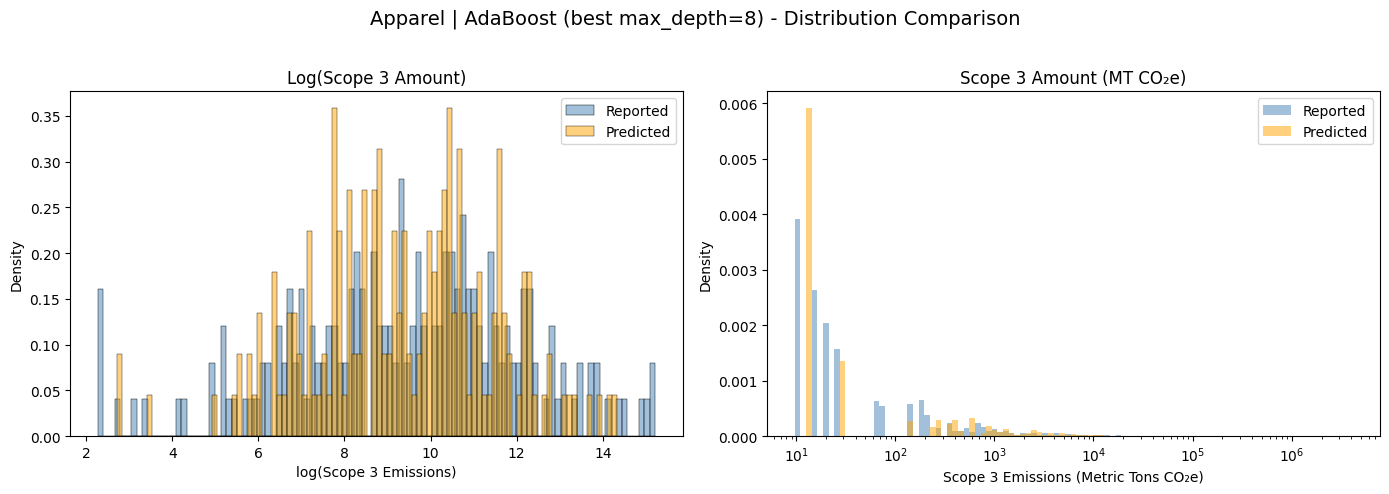

Apparel - RMSLE: 1.5737, R²: 0.6647
Processing group: Biotech, health care & pharma
Best max_depth for Biotech, health care & pharma: 14 (R² = 0.7646)


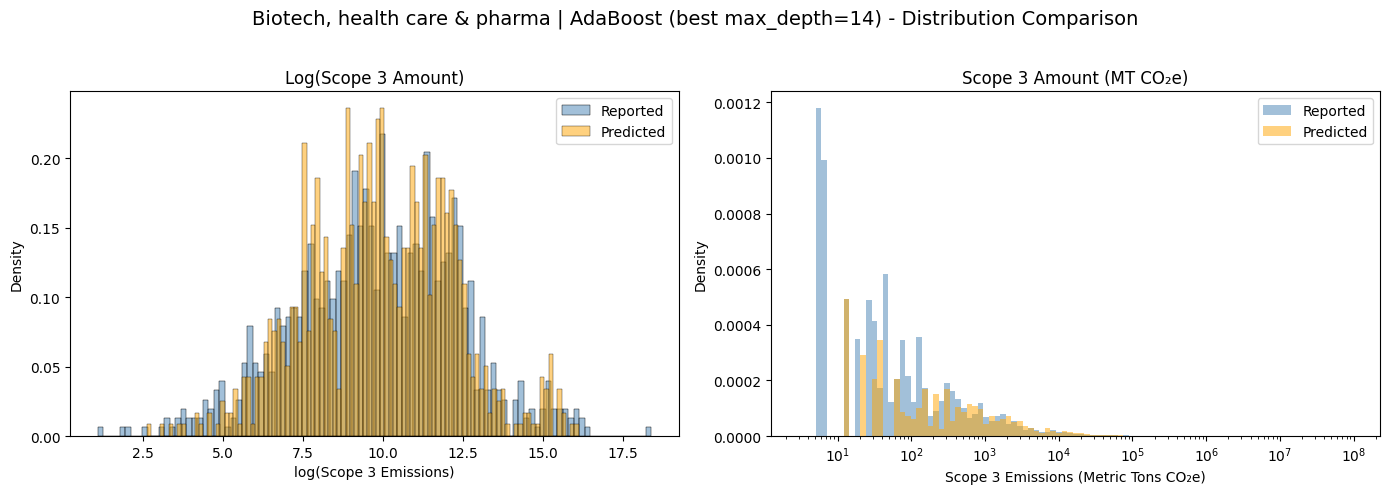

Biotech, health care & pharma - RMSLE: 1.2546, R²: 0.7646
Processing group: Corporate Tags
Skipping 'Corporate Tags' (not enough data: 8 rows)
Processing group: Food, beverage & agriculture
Best max_depth for Food, beverage & agriculture: 14 (R² = 0.7752)


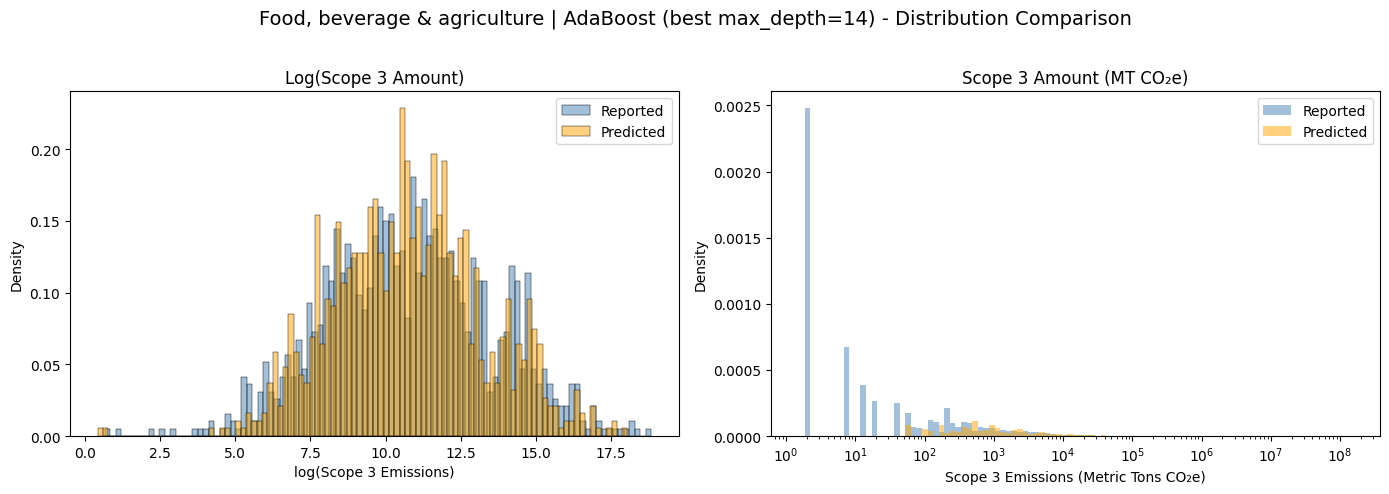

Food, beverage & agriculture - RMSLE: 1.3293, R²: 0.7752
Processing group: Fossil Fuels
Best max_depth for Fossil Fuels: 16 (R² = 0.8524)


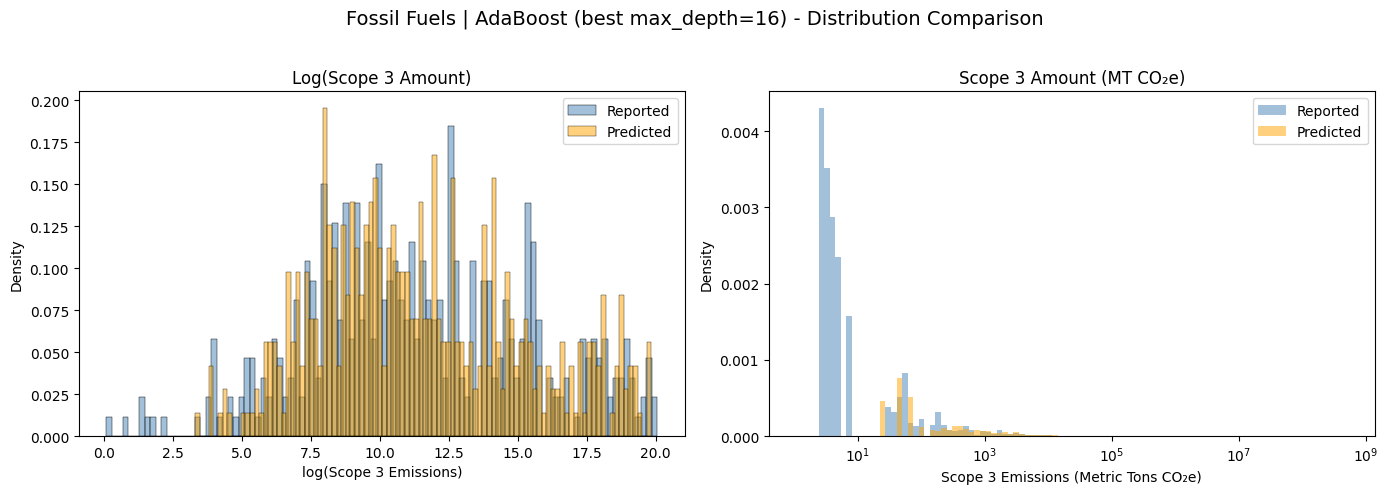

Fossil Fuels - RMSLE: 1.5618, R²: 0.8524
Processing group: Hospitality
Best max_depth for Hospitality: 10 (R² = 0.7503)


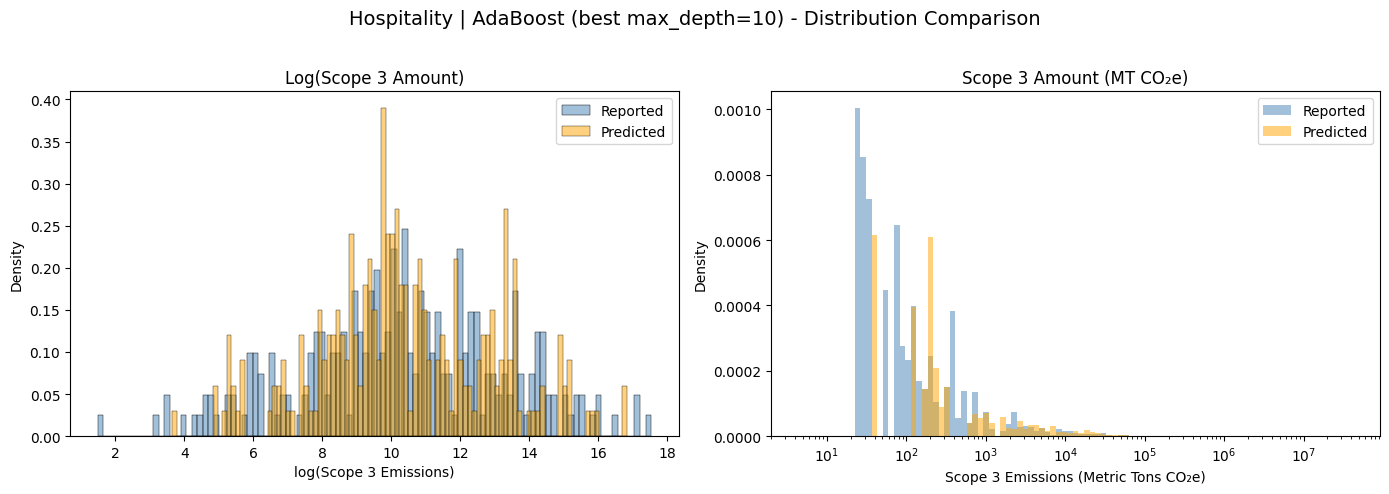

Hospitality - RMSLE: 1.4763, R²: 0.7503
Processing group: Infrastructure
Best max_depth for Infrastructure: 16 (R² = 0.7604)


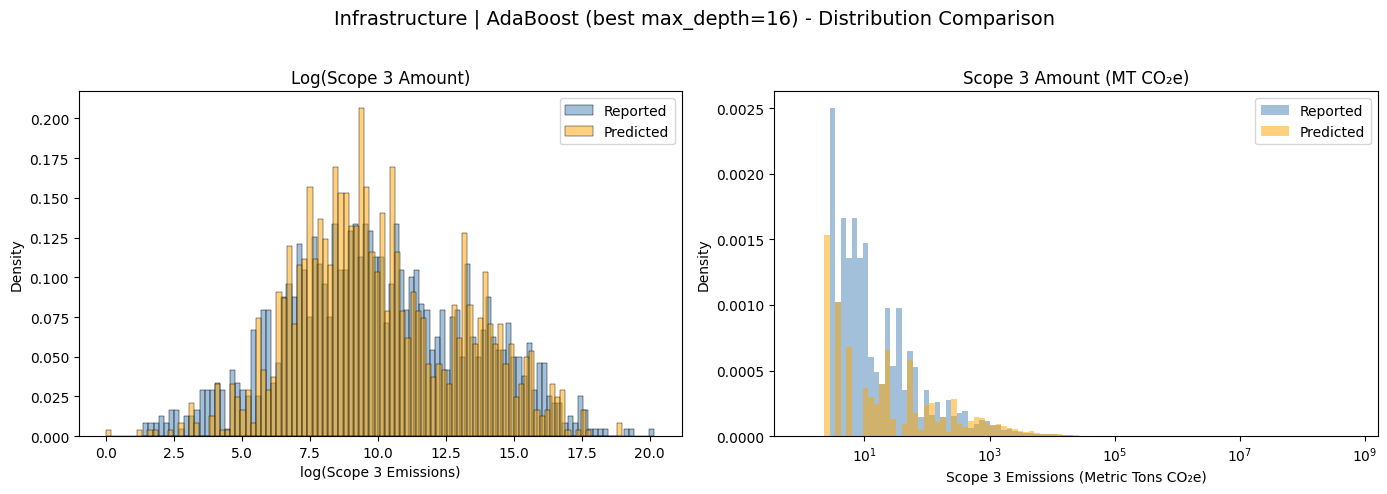

Infrastructure - RMSLE: 1.6801, R²: 0.7604
Processing group: Manufacturing
Best max_depth for Manufacturing: 16 (R² = 0.7637)


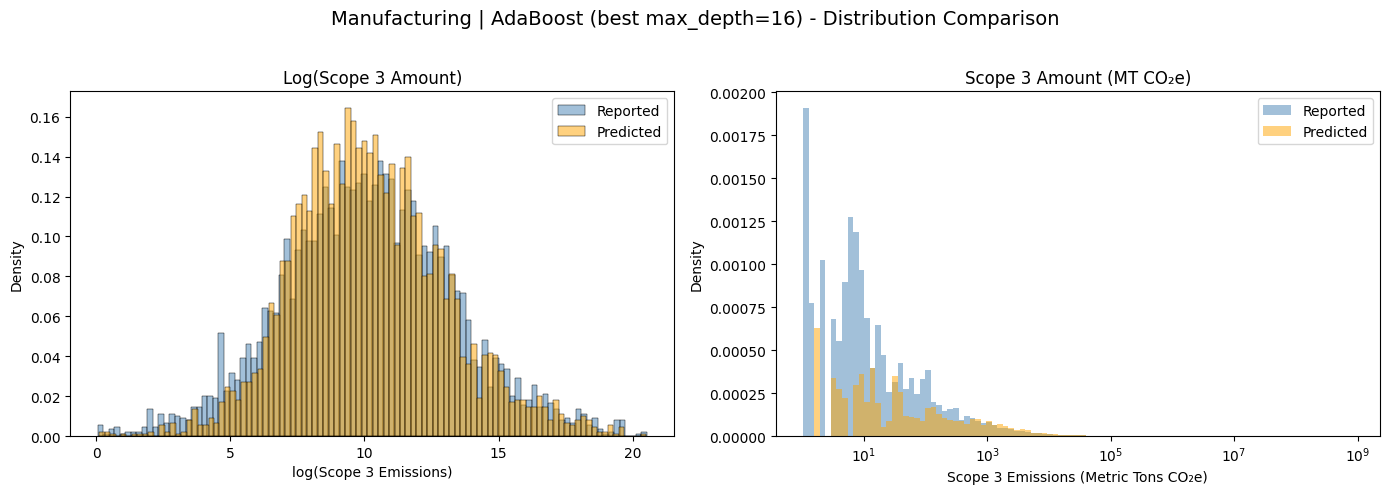

Manufacturing - RMSLE: 1.5647, R²: 0.7637
Processing group: Materials
Best max_depth for Materials: 16 (R² = 0.7937)


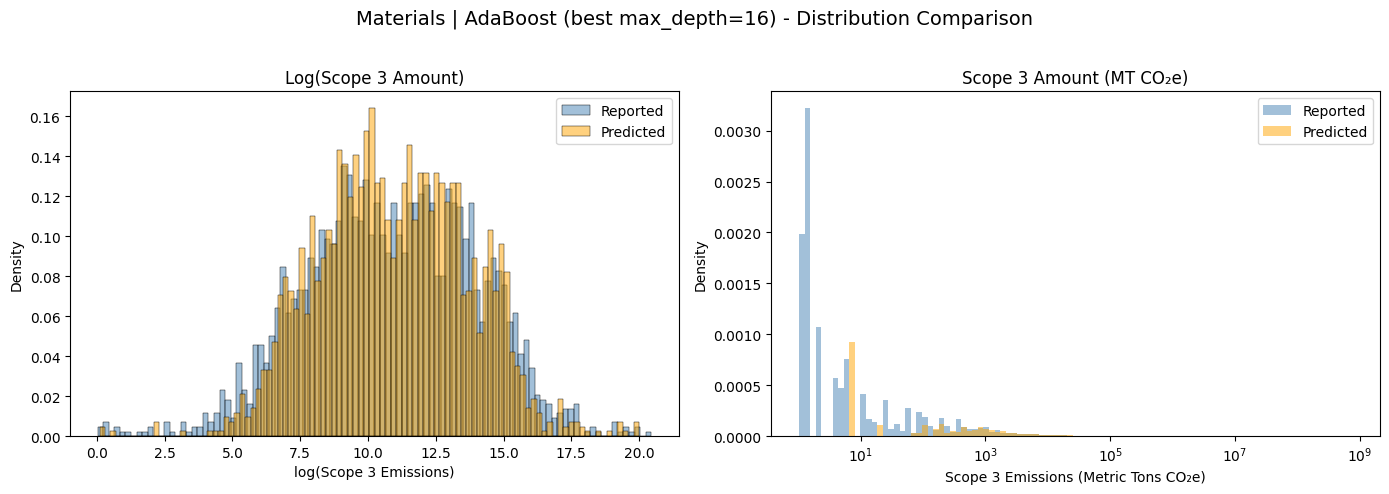

Materials - RMSLE: 1.4208, R²: 0.7937
Processing group: Power generation
Best max_depth for Power generation: 10 (R² = 0.7713)


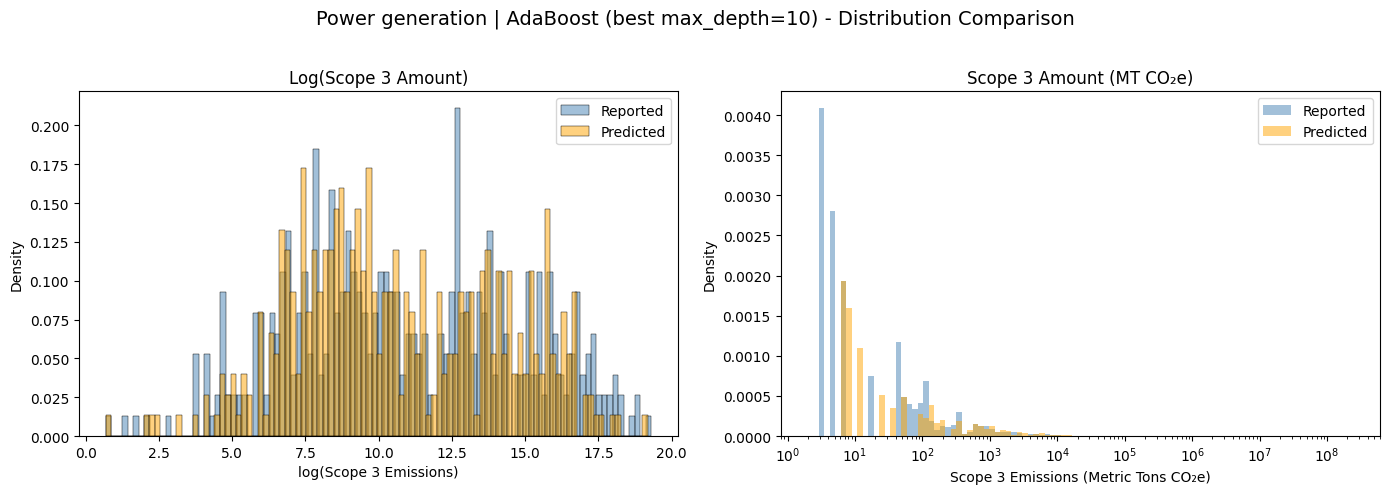

Power generation - RMSLE: 1.8623, R²: 0.7713
Processing group: Retail
Best max_depth for Retail: 12 (R² = 0.7116)


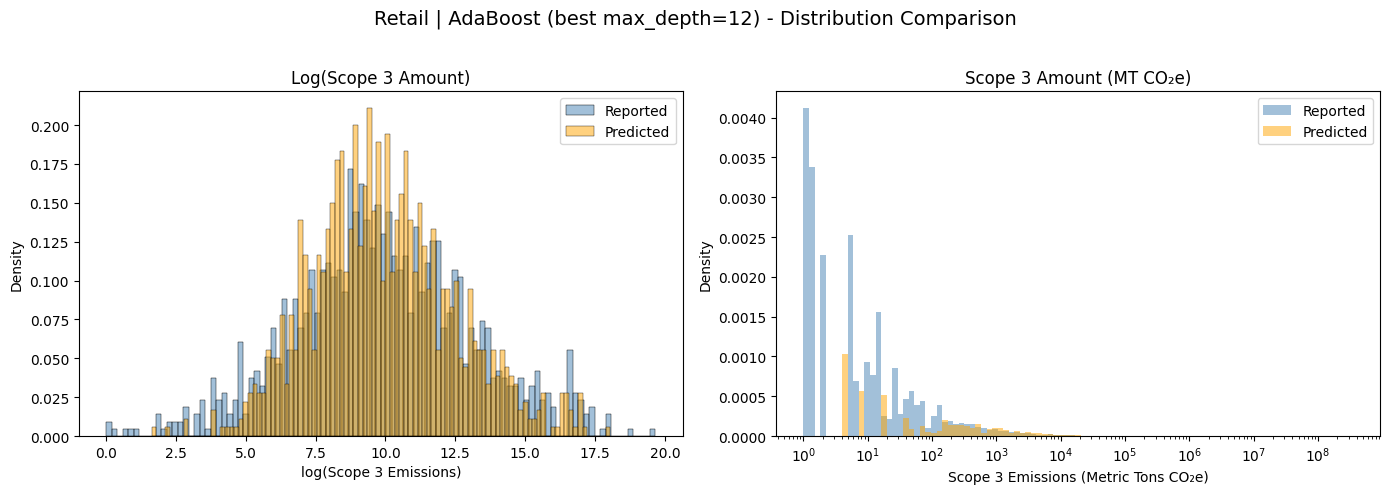

Retail - RMSLE: 1.7113, R²: 0.7116
Processing group: Services
Best max_depth for Services: 16 (R² = 0.7072)


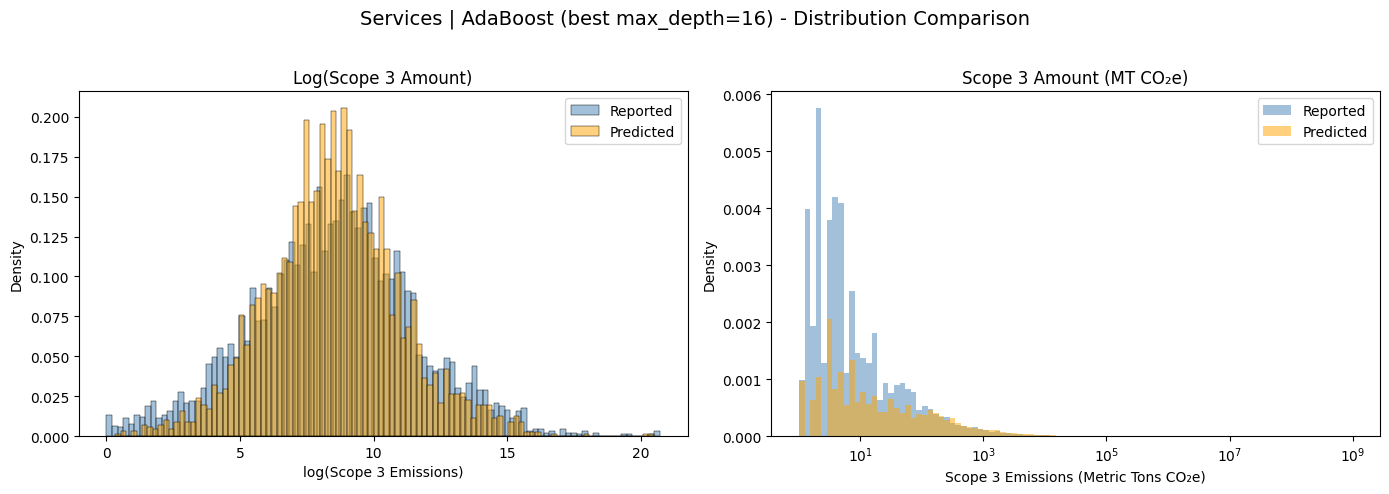

Services - RMSLE: 1.6701, R²: 0.7072
Processing group: Transportation services
Best max_depth for Transportation services: 10 (R² = 0.6902)


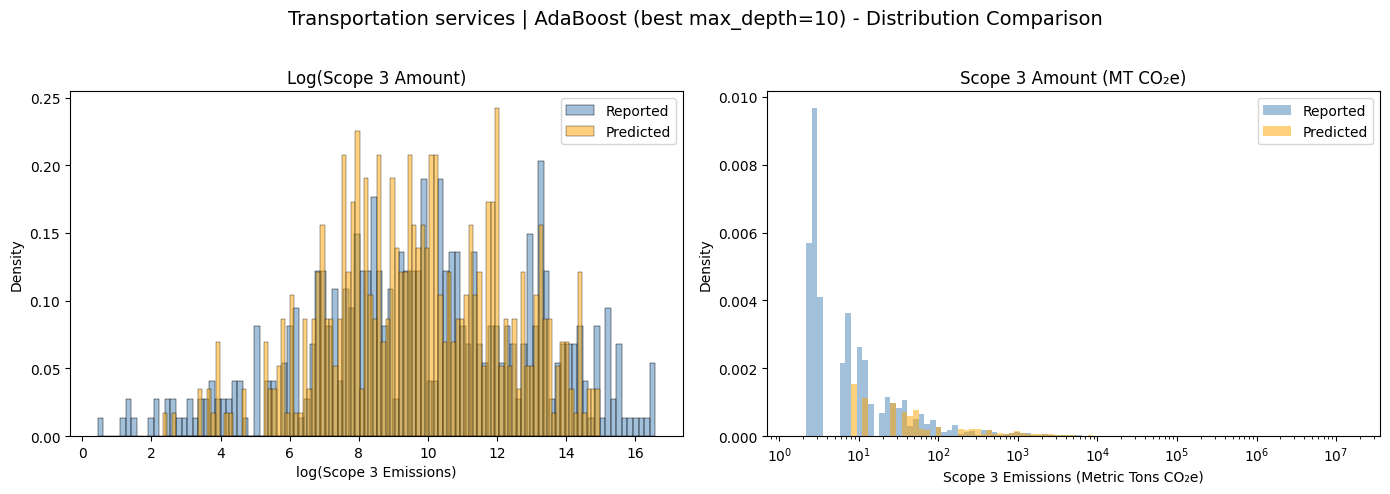

Transportation services - RMSLE: 1.8481, R²: 0.6902

Summary of model performance across groups:
                                  rmsle  r2_score  best_depth  n_train  n_test
Biotech, health care & pharma  1.254609  0.764634        14.0   3508.0   878.0
Food, beverage & agriculture   1.329328  0.775167        14.0   4265.0  1067.0
Materials                      1.420826  0.793713        16.0   8565.0  2142.0
Hospitality                    1.476346  0.750324        10.0   1009.0   253.0
Fossil Fuels                   1.561795  0.852440        16.0   1730.0   433.0
Manufacturing                  1.564699  0.763679        16.0  17403.0  4351.0
Apparel                        1.573653  0.664719         8.0    768.0   192.0
Services                       1.670086  0.707238        16.0  17481.0  4371.0
Infrastructure                 1.680070  0.760415        16.0   5094.0  1274.0
Retail                         1.711251  0.711643        12.0   4385.0  1097.0
Transportation services        1.8

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, r2_score

# ----------------------
# Target Preprocessing
# ----------------------

# Remove rows where Scope 3 Amount is 0 or missing
prepped_df = prepped_df[prepped_df["Scope 3 Amount"] > 0].copy()

# Create log-transformed target
prepped_df["log_Scope 3 Amount"] = np.log1p(prepped_df["Scope 3 Amount"])

# Group by Scope 3 Source type
grouped_dfs = {
    group_name: group_df.copy()
    for group_name, group_df in prepped_df.groupby("Primary industry")
}

# ----------------------
# Define Features and Target
# ----------------------

categorical_cols = ["Scope 3 Sources",
     "Primary activity", "Primary sector",
    "Countries", "Evaluation Status", "Calculation_Method_modeled", 
    "Third_Party_Verification"
]

numeric_cols = [
    "log_Scope 1 2 total emission", "log_Revenue_USD",
    "log_Market_Cap_USD", "log_ebitda_USD", "log_grossProfit_USD", "log_netIncome_USD",
    "log_cashAndCashEquivalents_USD", "log_longTermInvestments_USD",
    "log_totalAssets_USD", "log_totalLiabilities_USD", "log_totalInvestments_USD",
    "log_totalDebt_USD", "log_totalEquity_USD", "Perc emissions calculated w primary data"
]

target_col = "log_Scope 3 Amount"

# ----------------------
# Results storage
# ----------------------
group_results = {}

# ----------------------
# Loop through Groups
# ----------------------
for group_name, group_df in grouped_dfs.items():
    print(f"Processing group: {group_name}")

    required_cols = categorical_cols + numeric_cols + [target_col]
    df_clean = group_df[required_cols].dropna()

    if df_clean.shape[0] < 20:
        print(f"Skipping '{group_name}' (not enough data: {df_clean.shape[0]} rows)")
        continue

    # Split features and target
    X = df_clean[categorical_cols + numeric_cols].copy()
    y = df_clean[target_col].copy()

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Preprocessing Pipelines
    categorical_pipeline = Pipeline([
        ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ("cat", categorical_pipeline, categorical_cols),
        ("num", "passthrough", numeric_cols)
    ])

    # ----------------------
    # Grid Search for Best max_depth
    # ----------------------
    depth_options = [2, 4, 6, 8, 10, 12, 14, 16]
    best_r2 = -np.inf
    best_model = None
    best_y_pred = None
    best_depth = None

    for depth in depth_options:
        base_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)

        model_pipeline = Pipeline(steps=[
            ("preprocessing", preprocessor),
            ("model", AdaBoostRegressor(estimator=base_tree, n_estimators=100, random_state=42))
        ])

        model_pipeline.fit(X_train, y_train)
        y_pred = model_pipeline.predict(X_test)
        r2 = r2_score(y_test, y_pred)

        if r2 > best_r2:
            best_r2 = r2
            best_depth = depth
            best_model = model_pipeline
            best_y_pred = y_pred

    print(f"Best max_depth for {group_name}: {best_depth} (R² = {best_r2:.4f})")

    # Final best model
    y_pred = best_y_pred
    model_pipeline = best_model

    # ----------------------
    # Metrics
    # ----------------------
    # back‐transform to original scale
    y_test_exp = np.expm1(y_test)
    y_pred_exp = np.expm1(best_pred)

    # R² on log-scale → % with 1 decimal
    r2_pct = best_r2 * 100

    # MAPE on real scale → % with 1 decimal
    mape = np.mean(np.abs((y_test_exp - y_pred_exp) / y_test_exp)) * 100
    
    rmsle = np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred)))
    # RMSE and MAE on real scale
    rmse_orig = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
    mae_orig = mean_absolute_error(y_test_exp, y_pred_exp)
    # MAPE already computed above as mape
    # store for summary
    group_results[group_name] = {
        "R²(log)":     f"{r2_pct:.1f}%",
        "MAPE_orig":   f"{mape:.1f}%",
        "RMSLE":       f"{rmsle:.2f}",
        "RMSE_orig":   f"{rmse_orig:.2f}",
        "MAE_orig":    f"{mae_orig:.2f}",
        "max_depth":   best_depth,
        "n_train":     X_train.shape[0],
        "n_test":      X_test.shape[0]
    }

    # ----------------------
    # Dual Histogram Plots
    # ----------------------
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    bins = 100

    # Plot A: Log space
    sns.histplot(y_test, bins=bins, stat="density", color="steelblue", alpha=0.5, label="Reported", ax=axes[0])
    sns.histplot(y_pred, bins=bins, stat="density", color="orange", alpha=0.5, label="Predicted", ax=axes[0])
    axes[0].set_title("Log(Scope 3 Amount)")
    axes[0].set_xlabel("log(Scope 3 Emissions)")
    axes[0].set_ylabel("Density")
    axes[0].legend()

    # Plot B: Real-world space
    y_test_exp = np.expm1(y_test)
    y_pred_exp = np.expm1(y_pred)

    # Define logarithmic bins for a smoother histogram in log space
    min_val = min(y_test_exp.min(), y_pred_exp.min())
    max_val = max(y_test_exp.max(), y_pred_exp.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)

    sns.histplot(y_test_exp, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported", ax=axes[1])
    sns.histplot(y_pred_exp, bins=log_bins, stat="density", color="orange", alpha=0.5, label="Predicted", ax=axes[1])

    axes[1].set_xscale("log")
    axes[1].set_title("Scope 3 Amount (MT CO₂e)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()

    plt.suptitle(f"{group_name} | AdaBoost (best max_depth={best_depth}) - Distribution Comparison", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # Store results
    group_results[group_name] = {
        "rmsle": rmsle,
        "r2_score": best_r2,
        "best_depth": best_depth,
        "n_train": X_train.shape[0],
        "n_test": X_test.shape[0]
    }

    print(f"{group_name} - RMSLE: {rmsle:.4f}, R²: {best_r2:.4f}")

# ----------------------
# Summary Table
# ----------------------
results_df = pd.DataFrame(group_results).T.sort_values("rmsle")
print("\nSummary of model performance across groups:")
print(results_df)


In [43]:
group_results_w_scope_1_2 = group_results

import json

# Save the dictionary as JSON with UTF-8-SIG encoding
with open(r"C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\group_results_w_scope_1_2.json", "w", encoding="utf-8-sig") as f:
    json.dump(group_results_w_scope_1_2, f, indent=4, ensure_ascii=False)
